# Mod 3 Project
## Classification of
mod3project

In [1056]:
#import files

from bs4 import BeautifulSoup
import pandas as pd
import json
import time
import requests
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import requests 

api_key = "cb28b6201d1c2a41e60cadc3c03c53fe"


def get_info(endpoint, start, end): 
    data = []
    url = f'https://api-v3.igdb.com/{endpoint}'
    headers = {
            'user-key': api_key,
        }
    field = ["genres.name", "age_ratings.category", "age_ratings.rating","aggregated_rating","game_engines.companies",
              "game_engines.name", "release_dates.human", "game_modes.name", "involved_companies.company.name", 
              "involved_companies.developer", "involved_companies.publisher",
              "multiplayer_modes","platforms", "popularity","storyline", "summary", f"name; where (id > {start}) & (id <={end}) & platforms=(6); limit 50;"]

    parameters = {
            "fields" : ",".join(field),
#             'filter[id][gte]': '0',
#             'filter[self.id][lte]': '1000',
    }
    igdb_api = requests.get(url, headers=headers, params=parameters)
    data.append(igdb_api.json())
#     offset += SEARCH_LIMIT
#     search_count = data[0]["total"] - offset

    return data
# data = get_all_info()
# datab

In [3]:
def check_status():
    url = 'https://api-v3.igdb.com/api_status'
    headers = {
            'user-key': api_key,
        }
    igdb_api = requests.get(url, headers=headers)
    return igdb_api.json()



In [385]:
check_status()

[{'authorized': True,
  'plan': 'Free',
  'usage_reports': {'usage_report': {'metric': 'hits',
    'period': 'month',
    'period_start': '2019-03-01 00:00:00 +0000',
    'period_end': '2019-04-01 00:00:00 +0000',
    'max_value': 10000,
    'current_value': 1951}}}]

In [361]:
# explore20 = get_info("games", 14965, 16000)
# check = []
# for data in explore20[0]:
#     check.append(data["id"])
#     check = sorted(check)
# max(check)
len(explore20)

1

In [57]:
explore[0]

[{'id': 90512, 'name': 'Asian Riddles 4'},
 {'id': 98774,
  'game_modes': [{'id': 1, 'name': 'Single player'}],
  'genres': [15, 32],
  'name': 'Whitevale Defender',
  'summary': 'Help King Theodore save Whitevale from hordes of war machines in this handcrafted, retro strategy defense game.'},
 {'id': 54981,
  'name': 'Banned Memories: Yamanashi',
  'summary': 'An indie survival horror game inspired by PS1 low-poly graphics and the likes of early horror titles. The gameplay and visuals feature a retro style with the option to use tank controls and a dualshock controller for an even more authentic experience.'},
 {'id': 60779,
  'genres': [9],
  'name': 'Fallen Shadows',
  'summary': 'A hidden object game set in a post-Katrina New Orleans'},
 {'id': 60730,
  'genres': [14],
  'name': 'Quidditch Manager',
  'summary': 'A free quidditch simulation and management browser game.'},
 {'id': 81332, 'name': 'Stick Fighter II'},
 {'id': 105842, 'name': 'Robots Vs Zombies: Transform To Race And F

In [83]:
explore[0][1], explore1[0][1]

({'id': 98774,
  'game_modes': [{'id': 1, 'name': 'Single player'}],
  'genres': [15, 32],
  'name': 'Whitevale Defender',
  'summary': 'Help King Theodore save Whitevale from hordes of war machines in this handcrafted, retro strategy defense game.'},
 {'id': 98774,
  'game_modes': [{'id': 1, 'name': 'Single player'}],
  'genres': [{'id': 15, 'name': 'Strategy'}, {'id': 32, 'name': 'Indie'}],
  'name': 'Whitevale Defender',
  'summary': 'Help King Theodore save Whitevale from hordes of war machines in this handcrafted, retro strategy defense game.'})

In [158]:
!pip install selenium

    100% |████████████████████████████████| 911kB 6.9MB/s ta 0:00:011


In [331]:
# def automate_get_info(endpoint):
#     lst = []
#     data = []
#     start = 9983
#     end = 11000
#     i = 0
#     while len(data) <= 620:
#         d = get_info(endpoint, start, end)[0]
#         for item in d:
#             lst.append(item["id"]) 
#         data.extend(d)
#         start = max(lst)
#         end = start*50
#         i += 1
#     return data, lst
        
        
       

In [332]:
# auto_data = automate_get_info("games")

In [368]:
our_data_original.extend(explore5[0])
our_data_original.extend(explore6[0])
our_data_original.extend(explore7[0])
our_data_original.extend(explore8[0])
our_data_original.extend(explore9[0])
our_data_original.extend(explore10[0])
our_data_original.extend(explore11[0])
our_data_original.extend(explore12[0])
our_data_original.extend(explore13[0])
our_data_original.extend(explore14[0])
our_data_original.extend(explore15[0])
our_data_original.extend(explore16[0])
our_data_original.extend(explore17[0])
our_data_original.extend(explore18[0])
our_data_original.extend(explore19[0])
our_data_original.extend(explore20[0])


In [4]:
def save_data(file_to_save_to, data):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [384]:
# save_data("751_games.json", our_data_original)

In [387]:
rating = []

for data in our_data_original:
    if 'age_ratings' in data.keys():
        rating.append(data['age_ratings'])

In [388]:
len(rating)

492

In [389]:
popularity = []

for data in our_data_original:
    if 'popularity' in data.keys():
        popularity.append(data['popularity'])

In [390]:
len(popularity)

750

In [393]:
genre = []

for data in our_data_original:
    if 'genres' in data.keys():
        genre.append(data['genres'])

In [394]:
len(genre)

740

In [5]:
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r

In [6]:
def get_review_content(df):
    return [df['reviews'][i]['review'] for i in range(len(df['reviews']))]

In [7]:
def get_steamlist():
    return requests.get('http://api.steampowered.com/ISteamApps/GetAppList/v0002/').json()

games_df = pd.DataFrame(get_steamlist()['applist']["apps"])
games = get_steamlist()['applist']["apps"]

In [111]:
save_data(games, "games.json")

In [426]:
type(games[0]["appid"])

int

In [8]:
len(games)

76587

In [8]:
def get_appid(name, games):
    for i in range(len(games['name'])):
        if games['name'][i].title() == name.title():
            return games['appid'][i]
    return "Did not find"

def get_game_info(appid):
    url = 'https://store.steampowered.com'
    ids = str(appid)
    r = requests.get(url+'/api/appdetails?appids='+ids).json()
    return r

In [20]:
data_from_steam_2[199]

{'1009711': {'success': True,
  'data': {'type': 'dlc',
   'name': 'Arcade Spirits - Artbook',
   'steam_appid': 1009711,
   'required_age': 0,
   'is_free': False,
   'controller_support': 'full',
   'detailed_description': "The Aesthetics of Arcade Spirits is a 54 page art book containing early character sketches, full-color high quality art, background information and notes on the game's development. It includes pre-production and production art of characters, backgrounds, game pixels, and more.<br />\r\n<br />\r\nArt by Molly Nemecek, Taylor Rose, and Justin Baldwin.",
   'about_the_game': "The Aesthetics of Arcade Spirits is a 54 page art book containing early character sketches, full-color high quality art, background information and notes on the game's development. It includes pre-production and production art of characters, backgrounds, game pixels, and more.<br />\r\n<br />\r\nArt by Molly Nemecek, Taylor Rose, and Justin Baldwin.",
   'short_description': 'An art book packed 

In [9]:
# we ended last on Tuesday on 15,000

def retrieve_steam_data(start, end):
    data_from_steam_ = []
    for num, game in enumerate(games[start: end]):
        if game["appid"] >= 10:
            data_from_steam_.append(get_game_info(game["appid"]))
        if num % 100 == 0:
            t = np.random.choice([1,1.1,1.2,1.3,1.4,1.5])
            print(num, t)
            time.sleep(t)
    return data_from_steam_ 
    
def get_reviews(appid, start_offset=0, fil='updated', review_type='all'):
    url = 'https://store.steampowered.com'
    reviews = '/appreviews/'
    p = {'day_range':'9223372036854775807', 
         'start_offset':start_offset, 
         'language':'english', 
         'filter':fil, 
         'review_type':review_type,
         'purchase_type':'all'}
    r = requests.get(url+reviews+str(appid)+'?json=1?', params=p).json()
    return r


In [455]:
get_reviews(413150)

{'success': 1,
 'query_summary': {'num_reviews': 20},
 'reviews': [{'recommendationid': '49788756',
   'author': {'steamid': '76561198156307585',
    'num_games_owned': 248,
    'num_reviews': 6,
    'playtime_forever': 1067,
    'playtime_last_two_weeks': 1067,
    'last_played': 1553655373},
   'language': 'english',
   'review': 'Nice little game for you and your friends to play, just make sure not to spend all of your money in one go. The farming x dating sim is a great mix\n',
   'timestamp_created': 1553696068,
   'timestamp_updated': 1553696068,
   'voted_up': True,
   'votes_up': 0,
   'votes_funny': 0,
   'weighted_vote_score': 0,
   'comment_count': 0,
   'steam_purchase': True,
   'received_for_free': False,
   'written_during_early_access': False},
  {'recommendationid': '49787487',
   'author': {'steamid': '76561198315640718',
    'num_games_owned': 4,
    'num_reviews': 1,
    'playtime_forever': 4061,
    'playtime_last_two_weeks': 309,
    'last_played': 1553699259},
  

In [10]:
def save_data(data, file_to_save_to):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [11]:
def open_save_data(file_to_open):
        """takes in a filename to open
           return """
        with open(file_to_open) as datajson:
            new_data =json.load(datajson)
        return new_data

# Open Json Files

In [402]:
k10 = open_save_data("10K_data.json")
k15 = open_save_data("15K_data.json")
k20 = open_save_data("test_20k.json")
k30 = open_save_data("30K_data.json")

In [491]:
k40_1k = open_save_data("1000_data_30000.json")
k40_2k = open_save_data("2000_data_30000.json")
k40_3k = open_save_data("3000_data_30000.json")
k40_4k = open_save_data("4000_data_30000.json")
k40_5k = open_save_data("5000_data_30000.json")
k40_6k = open_save_data("6000_data_30000.json")
k40_7k = open_save_data("7000_data_30000.json")
k40_8k = open_save_data("8000_data_30000.json")
k40_9k = open_save_data("9000_data_30000.json")
k40_10k = open_save_data("test_40k.json")

In [549]:
k50 = open_save_data("50K_data.json")

In [71]:
k60 = open_save_data("60K_data.json")

In [1060]:
t1 = open_save_data('1000_data_60000.json')
t2 = open_save_data('2000_data_60000.json')
t3 = open_save_data('3000_data_60000.json')
t4 = open_save_data('4000_data_60000.json')
t5 = open_save_data('5000_data_60000.json')
k65 = t1+t2+t3+t4+t5


In [1061]:
k76 = open_save_data('76K_data.json')

In [1062]:
len(k76)

11000

In [550]:
all_50K = all_40K + k50

In [551]:
len(all_50K)

49997

In [440]:
all_30K = np.array(k10+k15+k20+k30)

In [538]:
some_30K_40K = k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k

In [539]:
len(some_30K_40K)

9997

In [503]:
all_40K = k10+k15+k20+k30+k40_1k+k40_2k+k40_3k+k40_4k+k40_5k+k40_6k+k40_7k+k40_8k+k40_9k+k40_10k

In [548]:
save_data(some_30K_40K, "40K_data.json")

In [552]:
save_data(all_50K, "all50K.json")

In [562]:
save_data(cleaned_30_50K, "30K-50K.json")

In [663]:
all_60k = all_50K + k60

In [666]:
len(all_60k)

59997

In [665]:
save_data(all_60k, "all60K.json")

In [547]:
len(all_40K)

39997

In [1057]:
len(all_60k)

59997

In [505]:
# save_data(data_from_steam_3, "15K_data.json")

In [441]:
len(all_30K)

30000

In [51]:
# test_15K = open_save_data("15K_data.json")

In [112]:
combo = test_10K + test_15K

In [56]:
# save_data(combo, "15K_comno.json")

In [1065]:
all_60K = open_save_data('all60K.json')

In [1066]:
len(all_60K)

59997

In [1063]:
k60_k76 = k65+k76
#gathering ids for 60-76k

In [1067]:
all_76K = all_60K + k65+k76

In [1068]:
len(all_76K)

86002

# Initial Clean

In [1089]:
# helper for the clean non_id
def del_unwanted(dic, unwanted_lst):
    dic_copy = copy.deepcopy(dic)
    for key in unwanted_lst:
        if key in dic_copy:
            del dic_copy[key]
    return dic_copy

def clean_non_id_data(games_list, start, end):
    data_dic_lst = []
    data_f = copy.deepcopy(games_list)
    for game in data_f[start:end]:
        if type(game) == dict:
            for key, val in game.items():
                if "success" in val:
                        del val["success"]
                if val != {}:
                    new_val = del_unwanted(val["data"], ["header_image", "website", "packages", "package_groups",
                                                        "screenshots", "movies", "support_info", "background",
                                                        "content_descriptors", "controller_support", "drm_notice",
                                                        "ext_user_account_notice", "detailed_description", 
                                                        "short_description", "legal_notice", "linux_requirements",
                                                        "mac_requirements", "fullgame", "publishers", "demos",
                                                        "pc_requirements", "release_date", 'alternate_appid'])
            
                    data_dic_lst.extend([new_val])
    return data_dic_lst

In [396]:
cleaned_15k_2 = clean_non_id_data(combo,0, len(combo))
len(cleaned_15k_2)

4521

## Removing Columns we don't need

In [444]:
cleaned_30K = clean_non_id_data(all_30K,0, len(all_30K))
len(cleaned_30K)

9973

In [540]:
cleaned_30_40K = clean_non_id_data(some_30K_40K,0, len(some_30K_40K))
len(some_30K_40K)

9997

In [523]:
cleaned_40K = clean_non_id_data(all_40K,0, len(all_40K))
len(cleaned_40K)

12115

In [675]:
cleaned_50K = clean_non_id_data(all_50K,0, len(all_50K))
len(cleaned_50K)

15220

In [670]:
cleaned_60K = clean_non_id_data(all_60k,0, len(all_60k))
len(cleaned_60K)

17905

In [560]:
cleaned_30_50K = clean_non_id_data(some_30K_40K+k50,0, len(some_30K_40K+k50))
len(cleaned_30_50K)

5247

In [68]:
cleaned_50_60K = clean_non_id_data(k60,0, len(k60))
len(cleaned_50_60K)

2685

In [105]:
cleaned_60_65K = clean_non_id_data(k65,0, len(k65))
len(cleaned_60_65K)

4852

In [122]:
cleaned_60_76k = clean_non_id_data(k60_k76, 0 ,len(k60_k76))

In [1094]:
cleaned_76K = clean_non_id_data(all_76K,0, len(all_76K))
len(cleaned_76K)

25953

In [668]:
save_data(cleaned_50_60K, "50K-60K.json")

In [671]:
save_data(cleaned_60K, "60K_data_cleaned.json")

In [98]:
save_data(cleaned_60_65K, '65K_data_cleaned.json')

In [99]:
save_data(cleaned_65_76K, '76K_data_cleaned.json')

In [127]:
save_data(cleaned_60_76k, '60K_76K_data_cleaned.json')

In [1070]:
save_data(cleaned_76K, 'ALL_cleaned.json')

## More cleaning organizing columns

In [1090]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

def clean_data(dirty_dic, keep=False):
    clean_money(dirty_dic, True, keep)
    clean_dev(dirty_dic, keep)
    convert_to_1_0(dirty_dic, keep)
    date_reformatting(dirty_dic, keep)
    dlc_reformatting(dirty_dic, keep)
    get_clean_dummies(dirty_dic, "categories", cats, keep)
    get_clean_dummies(dirty_dic, "genres", genres, keep)
    get_total_from_dic(dirty_dic, "recommendations", keep)
    get_total_from_dic(dirty_dic, "achievements", keep)
    get_platform_dummies(dirty_dic, keep)
    get_metas_from_dic(dirty_dic, keep)
    clean_language(dirty_dic, keep=keep)
    return pd.DataFrame(dirty_dic)

In [446]:
df_clean_30K = pd.DataFrame(clean_data(cleaned_30K))

In [460]:
df_clean_30K.to_json("cleaned_30K.json")

In [541]:
df_30k_40_k = clean_data(cleaned_30_40K)

In [543]:
appid30_40 = df_30k_40_k.steam_appid.tolist()

In [545]:
save_data(appid30_40, "appid30k40k.json")

In [524]:
df_clean_40K = pd.DataFrame(clean_data(cleaned_40K))

In [676]:
df_clean_50K = clean_data(cleaned_50K)

In [674]:
df_clean_60K = clean_data(cleaned_60K)

In [108]:
df_cleaned_65K = clean_data(cleaned_60_65K)


In [1095]:
df_cleaned_76K = clean_data(cleaned_76K)
df_cleaned_76K.shape
#all cleaned

(25953, 39)

In [1074]:
df_cleaned_60_76k = clean_data(cleaned_60_76k)
#ids for 60-76k

NameError: name 'cleaned_60_76k' is not defined

In [128]:
len(df_cleaned_60_76k.steam_appid)

8048

In [398]:
df_clean = pd.DataFrame(clean_data(cleaned_15k_2))

In [511]:
df_clean_40K.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'alternate_appid',
       'developers', 'dlc', 'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'release_date', 'required_age', 'reviews', 'steam_appid', 'type',
       'windows'],
      dtype='object')

In [1096]:
df_cleaned_76K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,...,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,2.595300e+04,25953.0,2.595300e+04,25953.000000
mean,0.342542,0.263862,0.259508,0.104150,0.062228,0.056834,0.062806,0.515123,0.026818,0.042115,...,0.122375,0.212153,0.317420,3.747544,3.252187,6.244652,4.027010e+02,0.0,5.721254e+05,0.999306
std,0.474569,0.440734,0.438373,0.305461,0.241574,0.231529,0.242618,0.499781,0.161553,0.200854,...,0.327725,0.408840,0.465481,16.192600,4.351416,30.270805,1.534542e+04,0.0,2.530525e+05,0.026327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,3.693700e+05,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000e+00,0.0,5.567100e+05,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,4.000000,7.990000,0.000000e+00,0.0,7.799340e+05,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,96.000000,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000


In [576]:
t = pd.DataFrame(cleaned_50K)

,about_the_game,achievements,categories,developers,dlc,genres,is_free,metacritic,name,platforms,price_overview,recommendations,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",NaN,0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",NaN,0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",NaN,0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game
5,Prepare to lead your favorite school to champi...,{'total': 0},"[{'id': 2, 'description': 'Single-player'}]",[Wolverine Studios],NaN,"[{'id': '23', 'description': 'Indie'}, {'id': ...",False,NaN,Draft Day Sports: College Football 2019,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 3499, 'final': ...",NaN,0,NaN,1013700,English,game
6,"<h2 class=""bb_tag"">Pick up this powerful pack ...",{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",[Trion Worlds],NaN,"[{'id': '37', 'description': 'Free to Play'}, ...",False,NaN,RIFT - Laethys' Indulgence Power Pack,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 2999, 'final': ...",NaN,0,NaN,1013740,"French<strong>*</strong>, German<strong>*</str...",dlc
7,&quot;Jigsaw Masterpieces : Masterpieces of Wo...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...",[BottleCube inc.],NaN,"[{'id': '4', 'description': 'Casual'}]",False,NaN,Jigsaw Masterpieces : Masterpieces of World - ...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 299, 'final': 2...",NaN,0,NaN,1013780,"English, Japanese",dlc
8,This is a logical puzzle game needs brain.<br>...,"{'total': 2, 'highlighted': [{'name': 'Thinker...","[{'id': 2, 'description': 'Single-player'}, {'...",[Gumou],NaN,"[{'id': '23', 'description': 'Indie'}]",False,NaN,TheVeryHardPuzzleGame&Editor,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 399, 'final': 3...",NaN,0,NaN,1013790,"English, Simplified Chinese",game
9,Play as a the legendary assassin 'Kal' who is ...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...",[KOEX studio],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Legend of the Assassin KAl,"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,0,NaN,1013810,"English, Simplified Chinese",game


In [457]:
app_id_lst = df_clean_30K.steam_appid.tolist()

In [464]:
sorted(app_id_lst)[8474]

826496

In [564]:
df_clean.shape

(4521, 39)

In [567]:
df_clean.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name', 'price_overview',
       'recommendations', 'release_date', 'required_age', 'reviews',
       'steam_appid', 'supported_languages', 'type', 'windows'],
      dtype='object')

In [581]:
df_clean_50K.shape

(15220, 39)

In [582]:
df_clean_50K.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'release_date', 'required_age', 'reviews', 'steam_appid', 'type',
       'windows'],
      dtype='object')

In [583]:
df_clean_50K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,15220.000000,15220.000000,15220.000000,15220.0,15220.0,15220.000000,15220.000000,15220.000000,15220.0,15220.0,...,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.0,1.522000e+04,15220.000000
mean,0.306636,0.240867,0.265769,0.0,0.0,0.048423,0.055848,0.472470,0.0,0.0,...,0.117214,0.162878,0.267608,2.433574,2.922011,5.294059,134.640802,0.0,6.404373e+05,0.999803
std,0.461112,0.427624,0.441756,0.0,0.0,0.214666,0.229635,0.499258,0.0,0.0,...,0.321686,0.369266,0.442727,13.230944,4.069186,12.676009,4011.459945,0.0,2.386519e+05,0.014039
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.520000e+03,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,5.398775e+05,1.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000,0.0,6.494800e+05,1.000000
75%,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,3.000000,5.990000,0.000000,0.0,8.160525e+05,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,94.000000,29.000000,595.990000,239958.000000,0.0,1.047920e+06,1.000000


In [116]:
df_cleaned_76K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,...,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,25953.000000,2.595300e+04,25953.0,2.595300e+04,25953.000000
mean,0.342542,0.263862,0.259508,0.104150,0.062228,0.056834,0.062806,0.515123,0.026818,0.042115,...,0.122375,0.212153,0.317420,3.747544,3.252187,6.244652,4.027010e+02,0.0,5.721254e+05,0.999306
std,0.474569,0.440734,0.438373,0.305461,0.241574,0.231529,0.242618,0.499781,0.161553,0.200854,...,0.327725,0.408840,0.465481,16.192600,4.351416,30.270805,1.534542e+04,0.0,2.530525e+05,0.026327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.0,3.693700e+05,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000e+00,0.0,5.567100e+05,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,4.000000,7.990000,0.000000e+00,0.0,7.799340e+05,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,96.000000,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000


# Functions to help clean

In [1421]:
cats = ["Single-player", "Multi-player", 'Online Multi-Player', 'Local Multi-Player', 'Co-op', 
                'Online Co-op', 'Local Co-op', 'Shared/Split Screen', 'Cross-Platform Multiplayer', ]
genres = ['Action','Adventure', 'Indie', 'Casual', 'Massively Multiplayer', 'Racing', 'RPG', "Simulation", 
          "Strategy", "Sports", "Free to Play", "Early Access"]

platforms_lst = ["windows", "mac", "linux"]

months = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, 
          "Oct":10, "Nov":11, "Dec":12}

def get_clean_dummies(clean_dic, desc_key, descriptions, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        for key in descriptions:
            data[key] = 0
        if desc_key in data:
            for cat in data[desc_key]:
                if cat["description"] in descriptions:
                    data[cat["description"]] = 1
            del data[desc_key]
    return cleaned


def get_platform_dummies(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned: 
        if "platforms" in data:
            for key in platforms_lst:
                data[key] = 0 
                if key in data["platforms"]:
                    data[key] = int(data["platforms"][key])
        else:
            for key in platforms_lst:
                data[key] = 0 
        del data["platforms"]
    return cleaned

def get_total_from_dic(clean_dic, column, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if column in data:
            data[column] = data[column]["total"]
        else:
            data[column] = 0
    return cleaned

def get_metas_from_dic(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "metacritic" in data:
            data["metacritic"] = data["metacritic"]["score"]
        else:
            data["metacritic"] = 0
    return cleaned

def clean_dev(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    cleaned = copy.deepcopy(clean_dic)
    for data in cleaned:
        if "developers" in data:
            data["developers"] = ", ".join(data["developers"])
        else:
            data["developers"] = ""
    return cleaned

def dlc_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "dlc" in data:
            data["dlc"] = len(data["dlc"])
        else:
            data["dlc"] = 0
    return cleaned

def date_reformatting(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "release_date" in data:
            if data["release_date"]["date"][:3] in months:
                data["release_date"] = months[data["release_date"]["date"][:3]]
            else:
                data["release_date"] = 0
        else:
                data["release_date"] = 0
    return cleaned

def convert_to_1_0(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "is_free" in data:
            data["is_free"] = int(data["is_free"])
        else:
            data["is_free"] = 0
    return cleaned

def clean_money(clean_dic, nans_to_zero=False, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "price_overview" in data:
            if data["price_overview"]["currency"] == "USD":
                data["price_overview"] = round(data["price_overview"]["final"]*.01, 2)
        else:
            if nans_to_zero:
                data["price_overview"] = 0
    return cleaned

def clean_language(clean_dic, keep=True):
    if keep:
        cleaned = copy.deepcopy(clean_dic)
    else:
        cleaned = clean_dic
    for data in cleaned:
        if "supported_languages" in data:
            data["num_supported_languages"] = len(data["supported_languages"].split(","))
            del data["supported_languages"]
        else:
             data["num_supported_languages"] = 1
        
    return cleaned


In [171]:
test_cats1 = get_clean_dummies(test_ach, "categories")

In [177]:
test_gens = get_clean_dummies(test_cats1, "genres")

In [207]:
test_rec = get_total_from_dic(test_gens, "recommendations")

In [226]:
test_meta = get_metas_from_dic(test_rec)

In [352]:
test_plat = get_platform_dummies(test_meta)

In [282]:
test_dev = clean_dev(test_plat)

In [292]:
test_dlc = dlc_reformatting(test_dev)

In [320]:
test_date = date_reformatting(test_dlc)

In [332]:
test_is_free = convert_to_1_0(test_date)

In [380]:
test_price1 = clean_money(test_is_free)

In [381]:
test_price2 = clean_money(test_is_free, True)

In [428]:
test_lang = clean_language(test_price2)

In [434]:
test_lang[3]["num_supported_languages"]

1

In [383]:
test_price2[0]["price_overview"]

0

In [484]:
d = {"k" : 3}
e = {'f':4}

a.append(d)
a

[{'f': 4}, {'f': 4}, {'k': 3}]

# Explore DataFrame

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/plotting/_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


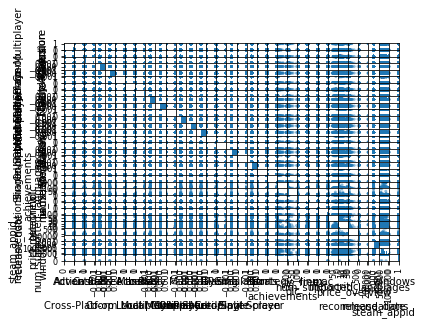

In [461]:
pd.plotting.scatter_matrix(df_clean_30K, figsize);

In [530]:
sum(df_clean_40K["Cross-Platform Multiplayer"]) == 0

True

In [ ]:
plt.heatmapdf_clean_40K

In [490]:
252950 in app_id_lst

False

In [646]:
df_clean_50K.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,is_free,linux,mac,metacritic,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows
count,15220.000000,15220.000000,15220.000000,15220.0,15220.0,15220.000000,15220.000000,15220.000000,15220.0,15220.0,...,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.0,1.522000e+04,15220.000000
mean,0.306636,0.240867,0.265769,0.0,0.0,0.048423,0.055848,0.472470,0.0,0.0,...,0.117214,0.162878,0.267608,2.433574,2.922011,5.294059,134.640802,0.0,6.404373e+05,0.999803
std,0.461112,0.427624,0.441756,0.0,0.0,0.214666,0.229635,0.499258,0.0,0.0,...,0.321686,0.369266,0.442727,13.230944,4.069186,12.676009,4011.459945,0.0,2.386519e+05,0.014039
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.520000e+03,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,5.398775e+05,1.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.990000,0.000000,0.0,6.494800e+05,1.000000
75%,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,...,0.000000,0.000000,1.000000,0.000000,3.000000,5.990000,0.000000,0.0,8.160525e+05,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,94.000000,29.000000,595.990000,239958.000000,0.0,1.047920e+06,1.000000


### Quick Observation

There are some columns that have no relevant information because they all 

# Review Cleaning

In [735]:
review_try_1 = open_save_data("reviews_from_first_clean30k.json")

In [736]:
review_try_2 = open_save_data("reviews_from_clean30k_50k.json")

In [746]:
review_try_3 = open_save_data("reviews_from_clean50K_60K.json")

In [1078]:
review_try_4 = open_save_data("reviews_from_clean60K_76K.json")

In [1104]:
review_try_4[0]

{'10': {'success': 1,
  'query_summary': {'num_reviews': 20,
   'review_score': 9,
   'review_score_desc': 'Overwhelmingly Positive',
   'total_positive': 32367,
   'total_negative': 964,
   'total_reviews': 33331},
  'reviews': [{'recommendationid': '49803728',
    'author': {'steamid': '76561198407734752',
     'num_games_owned': 39,
     'num_reviews': 9,
     'playtime_forever': 526,
     'playtime_last_two_weeks': 1,
     'last_played': 1552778818},
    'language': 'english',
    'review': 'Perfect childhood game!',
    'timestamp_created': 1553770027,
    'timestamp_updated': 1553770027,
    'voted_up': True,
    'votes_up': 0,
    'votes_funny': 0,
    'weighted_vote_score': 0,
    'comment_count': 0,
    'steam_purchase': True,
    'received_for_free': False,
    'written_during_early_access': False},
   {'recommendationid': '49802949',
    'author': {'steamid': '76561198815796326',
     'num_games_owned': 18,
     'num_reviews': 1,
     'playtime_forever': 212,
     'playtime_

In [632]:
review_try_1 = review_try_1[3:]

In [1101]:
review_combo = review_try_1 + review_try_2 + review_try_3 + review_try_4

In [1102]:
len(review_combo)

25953

In [641]:
for rev in review_try_2[:20]:
    print(list(rev.keys())[0])

1520
1620
1620
2400
3710
3720
3730
3800
3810
3820
3838
3839
3850
3900
3920
3960
3970
3980
3990
3990


In [1107]:
df_cleaned_76K.steam_appid

0        1013560
1        1013580
2        1013650
3        1013660
4        1013680
5        1013700
6        1013740
7        1013780
8        1013790
9        1013810
10       1013820
11       1013850
12       1013890
13       1013940
14       1013970
15       1013080
16       1013090
17       1013110
18       1013120
19       1013150
20       1013160
21       1013180
22       1013190
23       1013210
24       1013211
25       1013212
26       1013213
27       1013230
28       1013280
29       1013350
          ...   
25923     996430
25924     451840
25925    1017670
25926    1015620
25927     871200
25928     329970
25929     438740
25930     794800
25931    1002930
25932     615020
25933     588120
25934     454350
25935     754150
25936      16900
25937     262490
25938     500090
25939     503650
25940     777130
25941    1000110
25942    1007620
25943     843380
25944    1003720
25945    1028760
25946     680030
25947     625340
25948     606140
25949     505460
25950     8436

In [1122]:
review_try_4[0]['10']["reviews"]

[{'recommendationid': '49803728',
  'author': {'steamid': '76561198407734752',
   'num_games_owned': 39,
   'num_reviews': 9,
   'playtime_forever': 526,
   'playtime_last_two_weeks': 1,
   'last_played': 1552778818},
  'language': 'english',
  'review': 'Perfect childhood game!',
  'timestamp_created': 1553770027,
  'timestamp_updated': 1553770027,
  'voted_up': True,
  'votes_up': 0,
  'votes_funny': 0,
  'weighted_vote_score': 0,
  'comment_count': 0,
  'steam_purchase': True,
  'received_for_free': False,
  'written_during_early_access': False},
 {'recommendationid': '49802949',
  'author': {'steamid': '76561198815796326',
   'num_games_owned': 18,
   'num_reviews': 1,
   'playtime_forever': 212,
   'playtime_last_two_weeks': 61,
   'last_played': 1553250792},
  'language': 'english',
  'review': 'Acest joc pot sa spun ca este jocul copilariei mele.\nAm crescut cu el,imi amintesc ca prima data am jucat acest joc la un internet caffe,alaturi de tatal meu,pana cand mi-am cumparat cal

In [1125]:
#def clean_text(text):

def clean_review(lst_reviews):
    check = ['review_score','total_positive', 'total_negative', 'total_reviews']
    data_storage = []
    for rev in lst_reviews:
        app_id = list(rev.keys())[0]
        review_dict = {}
        review_dict["steam_appid"] = int(app_id)
        review_dict["reviews"] = ""
        for key in check:
            if "query_summary" in rev[app_id]:
                if key in rev[app_id]["query_summary"]:
                    review_dict[key] = rev[app_id]["query_summary"][key]
        if "reviews" in rev[app_id]:
            for text in rev[app_id]["reviews"]:
                review_dict["reviews"] += " " + text["review"]
        data_storage.append(review_dict)
    return data_storage

In [1121]:
review_for_df[0]

{'steam_appid': 359550,
 'reviews': " the most shit  game you will ever play , for the first time you will like it cuz it feels unique with gun fight and the fighting system , but the more you play the more you see how shit this game is full of bugs glitches really really bad tech support  , I talked to ubishit about my season pass that cost 30 fuckin euros , that it just gone from my account for no reason and I made a ticket and it has been 5 fuckin days with the only reply I got was the auto e-mail you get to  tell you that you have made a ticket . this game is ass , and If I can go back in time I would have never bought it .\n\nrating trash out of 10 I think i've come to the point where i think i'm sort of allowed to rate this game. In my honest opinion i have alot of fun, but i can compare it to a hate-love relationship.\n\n The idea was fresh when i picked the game up and it looked promising. Ubisoft got alot done in the last years with this game(that isn't exactly positive :P) an

In [1126]:
review_for_df_final = clean_review(review_combo)

In [1129]:
len(df_cleaned_76K)

25953

In [1128]:
len(review_for_df_final)

25953

In [1130]:
df_all_76K_rev = pd.DataFrame(review_for_df_final)

In [1132]:
df_all_76K_rev.to_json("FINAL_REVIEW.json")

In [1133]:
df_rev_no_dups_final = df_all_76K_rev.drop_duplicates("steam_appid")

In [1134]:
df_rev_no_dups_final.shape

(22646, 6)

In [1136]:
df_cleaned_final_final = df_cleaned_76K.drop("reviews", axis=1)

In [1137]:
df_cleaned_final_final = df_cleaned_final_final.drop_duplicates("steam_appid")

In [1138]:
len(df_cleaned_final_final)

22646

In [1139]:
df_review_final = df_rev_no_dups_final.sort_values("steam_appid")

In [1140]:
df_cleaned_final = df_cleaned_final_final.sort_values("steam_appid")

In [1141]:
df_cleaned_final.shape

(22646, 38)

In [1142]:
df_review_final.shape

(22646, 6)

In [1143]:
final_df = df_cleaned_final.merge(df_review_final, on="steam_appid")

In [1151]:
final_df[final_df.steam_appid == 10]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,release_date,required_age,steam_appid,type,windows,review_score,reviews,total_negative,total_positive,total_reviews
0,1,0,0,0,0,0,0,0,0,1,...,0,0,10,game,1,9.0,Perfect childhood game! Acest joc pot sa spun...,964.0,32367.0,33331.0


In [1152]:
final_df.to_json("FINAL_DF.json")

In [1153]:
final_df.describe()

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,num_supported_languages,price_overview,recommendations,release_date,steam_appid,windows,review_score,total_negative,total_positive,total_reviews
count,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.00000,22646.000000,22646.000000,22646.000000,...,22646.000000,22646.000000,2.264600e+04,22646.0,2.264600e+04,22646.000000,22645.000000,22645.000000,22645.000000,22645.000000
mean,0.337322,0.261503,0.264638,0.100901,0.060585,0.057538,0.06085,0.509406,0.027245,0.045218,...,3.250817,6.053175,4.014205e+02,0.0,6.027442e+05,0.999647,2.003003,48.529079,234.787414,283.316494
std,0.472806,0.439463,0.441150,0.301204,0.238572,0.232872,0.23906,0.499923,0.162801,0.207786,...,4.376392,32.217997,1.618673e+04,0.0,2.565940e+05,0.018792,3.004088,1218.969026,6517.368144,7520.408667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.0,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000e+00,0.0,4.220850e+05,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,2.990000,0.000000e+00,0.0,6.089415e+05,1.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,4.000000,7.990000,0.000000e+00,0.0,8.152325e+05,1.000000,5.000000,4.000000,12.000000,18.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,29.000000,4500.000000,2.182507e+06,0.0,1.055950e+06,1.000000,9.000000,119918.000000,857118.000000,977036.000000


In [1154]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'release_date', 'required_age', 'steam_appid', 'type', 'windows',
       'review_score', 'reviews', 'total_negative', 'total_positive',
       'total_reviews'],
      dtype='object')

In [1155]:
# final_df.drop("steam_appid", axis=1,inplace = True)
final_df.drop("release_date", axis=1,inplace = True)

In [1156]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'steam_appid', 'type', 'windows', 'review_score',
       'reviews', 'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [1160]:
final_df = final_df[(final_df.type == "game")]

In [1161]:
final_df.shape

(11127, 42)

'Killing Floor'

In [1170]:
final_df.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'about_the_game', 'achievements', 'developers', 'dlc',
       'is_free', 'linux', 'mac', 'metacritic', 'name',
       'num_supported_languages', 'price_overview', 'recommendations',
       'required_age', 'steam_appid', 'type', 'windows', 'review_score',
       'reviews', 'total_negative', 'total_positive', 'total_reviews'],
      dtype='object')

In [1275]:
final_df0 = final_df.drop(['reviews','type', 'steam_appid','about_the_game', "developers"], axis=1) 

In [1276]:
final_df0.drop("name", axis=1, inplace=True) 

In [1277]:
final_df0[final_df0.total_negative.isnull() == True]

,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,Local Multi-Player,...,metacritic,num_supported_languages,price_overview,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
20934,1,0,0,0,0,0,0,1,0,0,...,0,1,0.0,0,0,1,NaN,NaN,NaN,NaN


In [1282]:
final_df0 = final_df0.drop(final_df0[final_df0.total_negative.isnull() == True].index)

In [1283]:
final_df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11126 entries, 0 to 22645
Data columns (total 36 columns):
Action                        11126 non-null int64
Adventure                     11126 non-null int64
Casual                        11126 non-null int64
Co-op                         11126 non-null int64
Cross-Platform Multiplayer    11126 non-null int64
Early Access                  11126 non-null int64
Free to Play                  11126 non-null int64
Indie                         11126 non-null int64
Local Co-op                   11126 non-null int64
Local Multi-Player            11126 non-null int64
Massively Multiplayer         11126 non-null int64
Multi-player                  11126 non-null int64
Online Co-op                  11126 non-null int64
Online Multi-Player           11126 non-null int64
RPG                           11126 non-null int64
Racing                        11126 non-null int64
Shared/Split Screen           11126 non-null int64
Simulation              

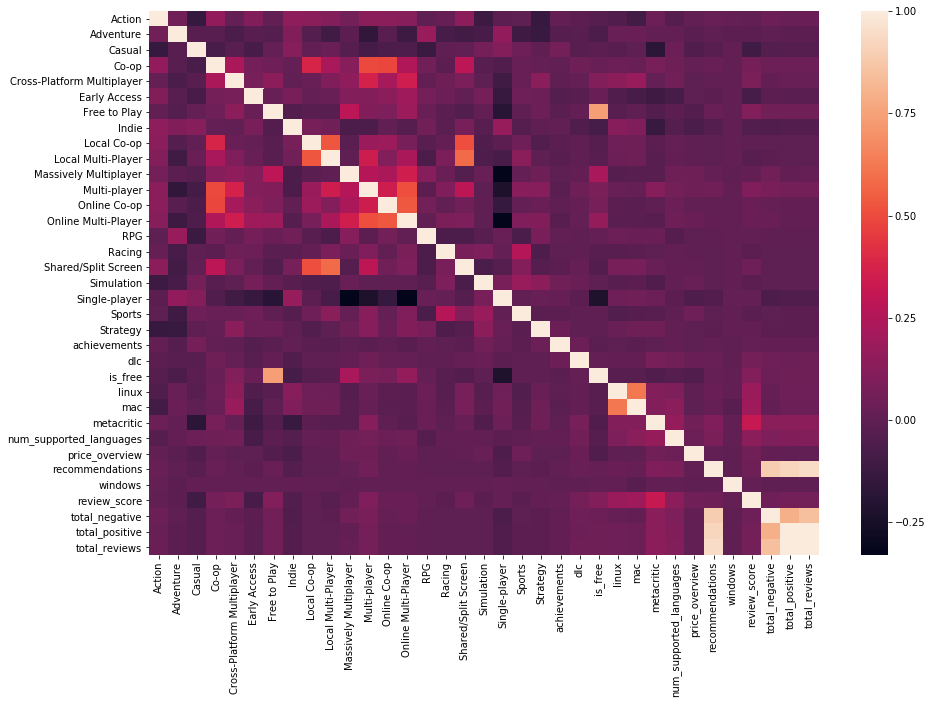

In [1195]:
correlations = final_df0.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlations)

In [1274]:
X_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11126 entries, 0 to 11125
Data columns (total 10 columns):
recommendations            11126 non-null float64
num_supported_languages    11126 non-null float64
review_score               11125 non-null float64
total_negative             11125 non-null float64
achievements               11126 non-null float64
dlc                        11126 non-null float64
total_positive             11125 non-null float64
total_reviews              11125 non-null float64
required_age               11126 non-null float64
metacritic                 11126 non-null float64
dtypes: float64(10)
memory usage: 869.3 KB


In [1349]:
final_df0.reset_index(inplace=True)
y = final_df0.price_overview
X = final_df0.drop(["price_overview"], axis=1)

In [1350]:
X

,index,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,...,mac,metacritic,num_supported_languages,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
0,0,1,0,0,0,0,0,0,0,0,...,1,88,8,65391,0,1,9.0,964.0,32367.0,33331.0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,9,2786,0,1,8.0,405.0,2172.0,2577.0
2,2,1,0,0,0,0,0,0,0,0,...,1,79,5,1979,0,1,8.0,191.0,1660.0,1851.0
3,3,1,0,0,0,0,0,0,0,0,...,1,0,9,922,0,1,8.0,134.0,708.0,842.0
4,4,1,0,0,0,0,0,0,0,0,...,1,0,4,4304,0,1,8.0,163.0,2897.0,3060.0
5,5,1,0,0,0,0,0,0,0,0,...,1,0,9,2086,0,1,8.0,353.0,1870.0,2223.0
6,6,1,0,0,0,0,0,0,0,0,...,1,96,8,22113,0,1,9.0,553.0,13736.0,14289.0
7,7,1,0,0,0,0,0,0,0,0,...,1,65,8,8807,0,1,8.0,466.0,4128.0,4594.0
8,8,1,0,0,0,0,0,0,0,0,...,1,71,3,3296,0,1,8.0,242.0,2102.0,2344.0
9,9,1,0,0,0,1,0,1,0,0,...,1,92,26,10409,0,1,8.0,18615.0,286430.0,305045.0


In [1351]:
from sklearn.preprocessing import StandardScaler
x_col = X[["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic']]
X_scale = StandardScaler().fit_transform(x_col)
y_scale = StandardScaler().fit_transform(np.array(y).reshape(-1, 1))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1354]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ration Explanation')

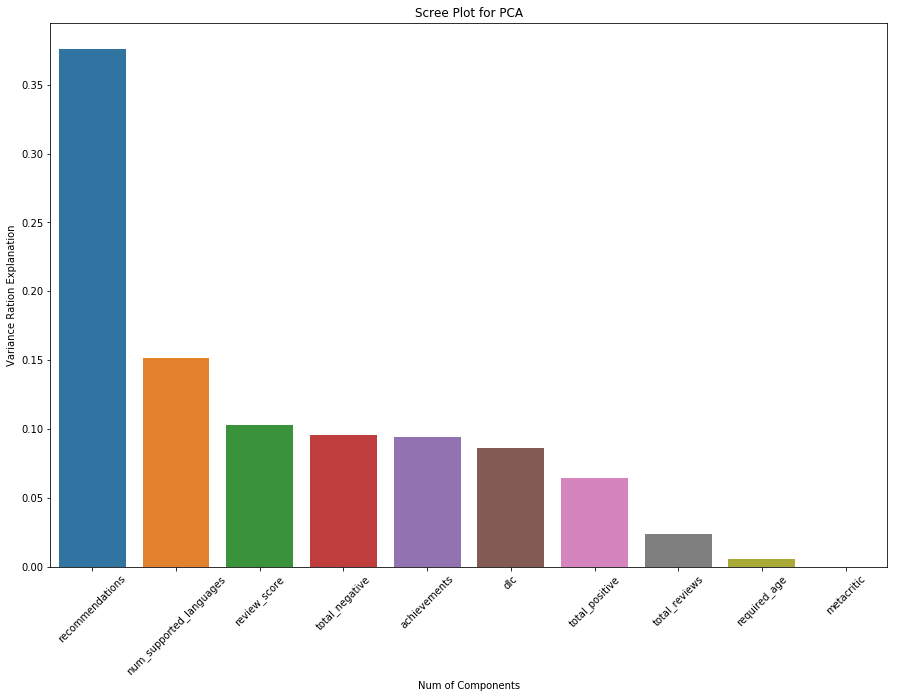

In [1355]:
index = X_scaled_df.columns
plt.figure(figsize=(15,10))
sns.barplot(index, pca.explained_variance_ratio_ )
plt.xticks(rotation=45)
plt.title("Scree Plot for PCA")
plt.xlabel("Num of Components")
plt.ylabel("Variance Ration Explanation")

### Observation

PCA shows us that we can drop required_age and metacritic.

In [1356]:
X_scaled_df = pd.DataFrame(data=X_scale, columns=["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic'])

In [1359]:
X_drop = X.drop(x_col, axis=1)

In [1364]:
X = X_drop.merge(X_scaled_df, on=X_drop.index)

In [1372]:
X_final = X.drop(["required_age", "metacritic"], axis=1)

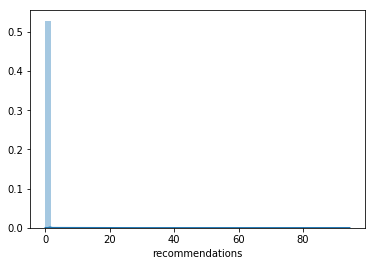

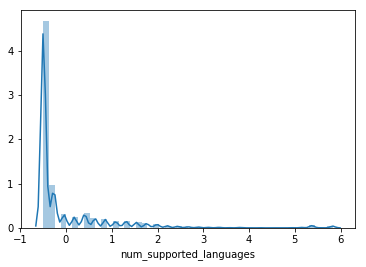

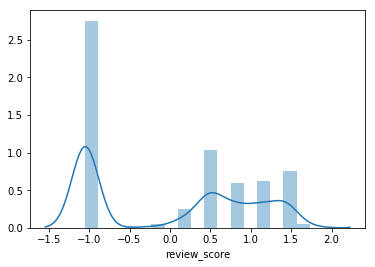

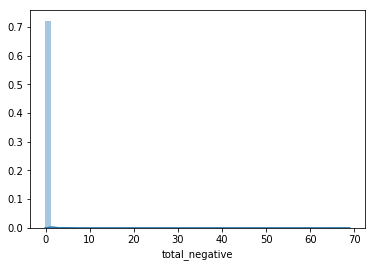

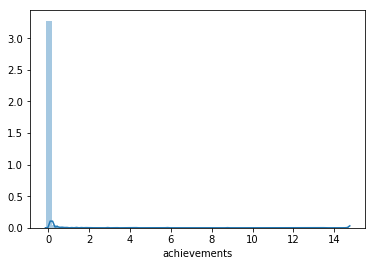

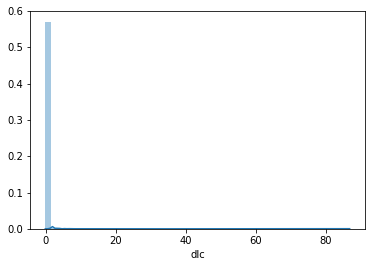

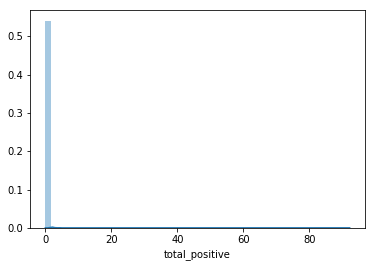

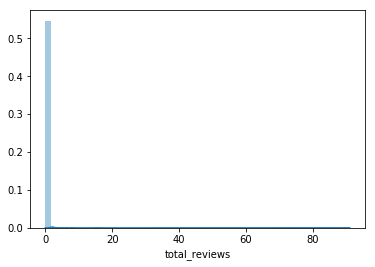

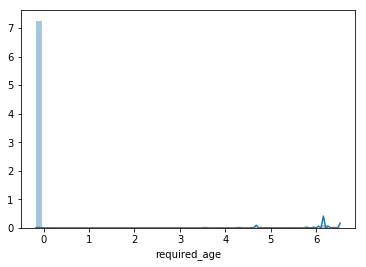

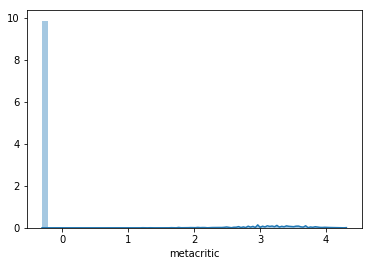

In [1373]:
for col in x_col:
    sns.distplot(X[col])
    plt.show()

In [1377]:
X.drop(["key_0","index"], axis=1,inplace=True)

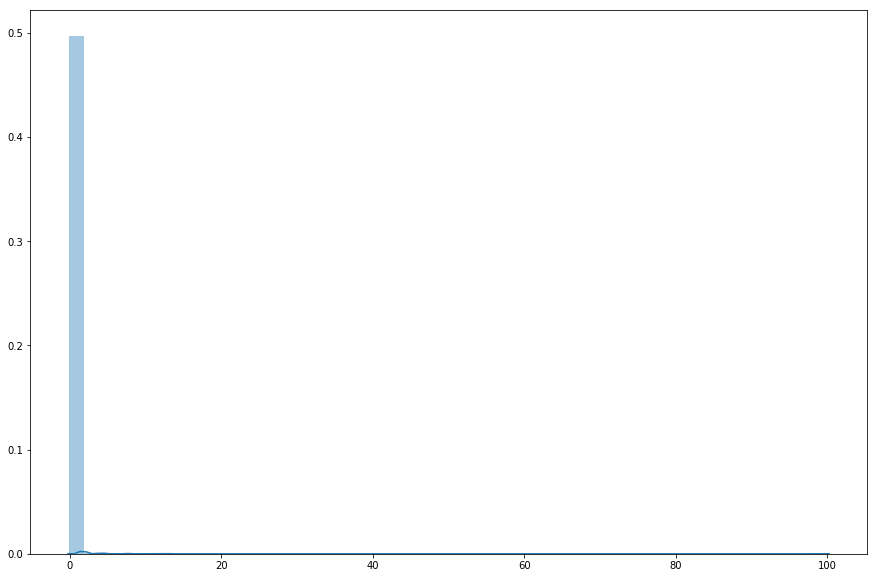

In [1386]:
plt.figure(figsize=(15,10))
sns.distplot(y_scale)

In [1388]:
y.mean()

7.71736563005648

In [1390]:
y.std()

44.840263818534666

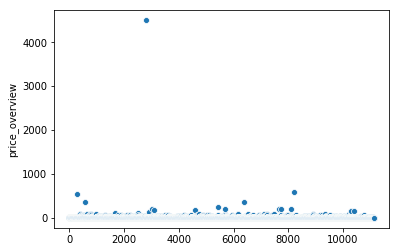

In [1400]:
x_lin = np.linspace(1, 11126, 11126)
sns.scatterplot(x_lin, y)

In [1405]:
y_df = pd.DataFrame(y)
y_df[y_df.price_overview > 1000]

,price_overview
2790,4500.0


In [1419]:
final_df[final_df.price_overview > 100].name

669                               Call of Duty®: Black Ops
1699     Resident Evil Revelations / Biohazard Revelations
3652                                           Eisenbahn X
5086     Wish -tale of the sixteenth night of lunar month-
5642                                Street Warriors Online
5854                                        The Music Room
6040                         3DF Zephyr Lite Steam Edition
6154                                         akeytsu Indie
9436                                    Marmoset Toolbag 3
11431                                                Minit
12929                                       CrisisActionVR
14039                      VEGAS Pro 15 Edit Steam Edition
16324                 Xara Designer Pro X 15 Steam Edition
16447    Home Architect - Design your floor plans in 3D...
17147                                   INFINITY CHALLENGE
17276                                   ADR-Labelling Game
21146                               Substance Painter 20

In [1303]:
pca1 = PCA(n_components=7)
pca1.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1304]:
pca1.explained_variance_ratio_

array([0.37603284, 0.15129879, 0.1028904 , 0.0953312 , 0.09391588,
       0.08618171, 0.06473668])

In [1261]:
X.columns

Index(['Action', 'Adventure', 'Casual', 'Co-op', 'Cross-Platform Multiplayer',
       'Early Access', 'Free to Play', 'Indie', 'Local Co-op',
       'Local Multi-Player', 'Massively Multiplayer', 'Multi-player',
       'Online Co-op', 'Online Multi-Player', 'RPG', 'Racing',
       'Shared/Split Screen', 'Simulation', 'Single-player', 'Sports',
       'Strategy', 'achievements', 'dlc', 'is_free', 'linux', 'mac',
       'metacritic', 'num_supported_languages', 'recommendations',
       'required_age', 'windows', 'review_score', 'total_negative',
       'total_positive', 'total_reviews'],
      dtype='object')

In [1338]:
X_scale

array([[ 2.79761364,  1.08597418,  1.73150082, ...,  3.05658058,
        -0.16961757,  3.92369232],
       [ 0.08573065,  1.31164748,  1.42277695, ...,  0.18784127,
        -0.16961757, -0.30833537],
       [ 0.05077355,  0.40895426,  1.42277695, ...,  0.12011984,
        -0.16961757,  3.4908713 ],
       ...,
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537],
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537],
       [-0.0349515 , -0.49373895, -1.047014  , ..., -0.05254181,
        -0.16961757, -0.30833537]])

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1320]:
X_scaled_df = pd.DataFrame(data=X_scale, columns=["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic'])

In [1322]:
X_scaled_df

,recommendations,num_supported_languages,review_score,total_negative,achievements,dlc,total_positive,total_reviews,required_age,metacritic
0,2.797614,1.085974,1.731501,0.499428,-0.120398,-0.084856,3.433450,3.056581,-0.169618,3.923692
1,0.085731,1.311647,1.422777,0.177711,-0.120398,-0.084856,0.183507,0.187841,-0.169618,-0.308335
2,0.050774,0.408954,1.422777,0.054549,-0.120398,-0.084856,0.128399,0.120120,-0.169618,3.490871
3,0.004987,1.311647,1.422777,0.021744,-0.120398,-0.084856,0.025934,0.026000,-0.169618,-0.308335
4,0.151486,0.183281,1.422777,0.038434,-0.120398,-0.084856,0.261540,0.232896,-0.169618,-0.308335
5,0.055409,1.311647,1.422777,0.147784,-0.120398,-0.084856,0.151002,0.154820,-0.169618,-0.308335
6,0.922925,1.085974,1.731501,0.262888,-0.120398,0.085684,1.428161,1.280339,-0.169618,4.308422
7,0.346544,1.085974,1.422777,0.212818,-0.120398,-0.084856,0.394035,0.375987,-0.169618,2.817594
8,0.107823,-0.042392,1.422777,0.083901,-0.120398,-0.084856,0.175973,0.166107,-0.169618,3.106142
9,0.415939,5.148094,1.422777,10.657980,1.425015,0.085684,30.778714,28.402117,-0.169618,4.116057


In [1323]:
X_scaled_df.shape

(11126, 10)

In [1324]:
X.shape

(11126, 35)

In [1325]:
X[["recommendations", 'num_supported_languages','review_score', 'total_negative', 'achievements', 'dlc',
        'total_positive', 'total_reviews', 'required_age','metacritic']] = X_scaled_df

In [1333]:
X.reset_index(inplace=True)

In [1335]:
X

,index,Action,Adventure,Casual,Co-op,Cross-Platform Multiplayer,Early Access,Free to Play,Indie,Local Co-op,...,mac,metacritic,num_supported_languages,recommendations,required_age,windows,review_score,total_negative,total_positive,total_reviews
0,0,1,0,0,0,0,0,0,0,0,...,1,3.923692,1.085974,2.797614,-0.169618,1,1.731501,0.499428,3.433450,3.056581
1,1,1,0,0,0,0,0,0,0,0,...,1,-0.308335,1.311647,0.085731,-0.169618,1,1.422777,0.177711,0.183507,0.187841
2,2,1,0,0,0,0,0,0,0,0,...,1,3.490871,0.408954,0.050774,-0.169618,1,1.422777,0.054549,0.128399,0.120120
3,3,1,0,0,0,0,0,0,0,0,...,1,-0.308335,1.311647,0.004987,-0.169618,1,1.422777,0.021744,0.025934,0.026000
4,4,1,0,0,0,0,0,0,0,0,...,1,-0.308335,0.183281,0.151486,-0.169618,1,1.422777,0.038434,0.261540,0.232896
5,5,1,0,0,0,0,0,0,0,0,...,1,-0.308335,1.311647,0.055409,-0.169618,1,1.422777,0.147784,0.151002,0.154820
6,6,1,0,0,0,0,0,0,0,0,...,1,4.308422,1.085974,0.922925,-0.169618,1,1.731501,0.262888,1.428161,1.280339
7,7,1,0,0,0,0,0,0,0,0,...,1,2.817594,1.085974,0.346544,-0.169618,1,1.422777,0.212818,0.394035,0.375987
8,8,1,0,0,0,0,0,0,0,0,...,1,3.106142,-0.042392,0.107823,-0.169618,1,1.422777,0.083901,0.175973,0.166107
9,9,1,0,0,0,1,0,1,0,0,...,1,4.116057,5.148094,0.415939,-0.169618,1,1.422777,10.657980,30.778714,28.402117


In [918]:
len(final_df )

8113

In [919]:
final_df[final_df.Action == 1].price_overview.mean()

7.735704526046744

In [920]:
final_df.is_free.mean()

0.09010230494268458

In [921]:
len(final_df[final_df.achievements>0])

3814

In [922]:
len(final_df[(final_df.price_overview>50)])

51

In [848]:
len(final_df[final_df.Indie==1])

8339

In [849]:
len(final_df[final_df.Indie==0])

5034

In [841]:
final_df.price_overview.mean()

7.182211171765133

In [923]:
len(final_df[final_df.review_score > 0])

3915

In [924]:
len(final_df[final_df.metacritic > 0])

453

In [925]:
len(final_df[final_df.total_positive > 0])

6457

In [926]:
len(final_df[final_df.total_negative > 0])

5640

In [927]:
len(final_df[final_df.recommendations > 0])

1066

In [928]:
# test = final_df[(final_df.type == "game") | (final_df.type == "dlc")]
len(test)

13373

In [384]:
df_test_almost_clean = pd.DataFrame(test_price1)
df_test_almost_clean2 = pd.DataFrame(test_price2)

In [393]:
df_test_almost_clean.shape

(4521, 42)

In [287]:
pd.DataFrame(test_dev).shape

(4521, 42)

In [520]:
pd.DataFrame(cleaned_15k)

,about_the_game,achievements,categories,demos,developers,dlc,genres,is_free,metacritic,name,...,platforms,price_overview,publishers,recommendations,release_date,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'appid': 1019840, 'description': ''}]",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[The Midnight Team],NaN,"{'coming_soon': True, 'date': 'Coming soon™'}",0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,...,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Double Mojo],NaN,"{'coming_soon': False, 'date': 'Feb 11, 2019'}",0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Adventure Islands],NaN,"{'coming_soon': False, 'date': 'Mar 1, 2019'}",0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",[TheBlavas],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[Saint Paul Studios],NaN,"{'coming_soon': False, 'date': 'Feb 3, 2019'}",0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game
5,Prepare to lead your favorite school to champi...,{'total': 0},"[{'id': 2, 'description': 'Single-player'}]",NaN,[Wolverine Studios],NaN,"[{'id': '23', 'description': 'Indie'}, {'id': ...",False,NaN,Draft Day Sports: College Football 2019,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 3499, 'final': ...",[Wolverine Studios],NaN,"{'coming_soon': False, 'date': 'Feb 8, 2019'}",0,NaN,1013700,English,game
6,"<h2 class=""bb_tag"">Pick up this powerful pack ...",{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Trion Worlds],NaN,"[{'id': '37', 'description': 'Free to Play'}, ...",False,NaN,RIFT - Laethys' Indulgence Power Pack,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 2999, 'final': ...",[Trion Worlds],NaN,"{'coming_soon': False, 'date': 'Jan 23, 2019'}",0,NaN,1013740,"French<strong>*</strong>, German<strong>*</str...",dlc
7,&quot;Jigsaw Masterpieces : Masterpieces of Wo...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[BottleCube inc.],NaN,"[{'id': '4', 'description': 'Casual'}]",False,NaN,Jigsaw Masterpieces : Masterpieces of World - ...,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 299, 'final': 2...",[BottleCube inc.],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013780,"English, Japanese",dlc
8,This is a logical puzzle game needs brain.<br>...,"{'total': 2, 'highlighted': [{'name': 'Thinker...","[{'id': 2, 'description': 'Singl

In [79]:
c_data = pd.DataFrame(cleaned_15K)

In [259]:
c_data.columns

Index(['about_the_game', 'achievements', 'categories', 'demos', 'developers',
       'dlc', 'genres', 'is_free', 'metacritic', 'name', 'pc_requirements',
       'platforms', 'price_overview', 'publishers', 'recommendations',
       'release_date', 'required_age', 'reviews', 'steam_appid',
       'supported_languages', 'type'],
      dtype='object')

In [324]:
c_data.head()

,about_the_game,achievements,categories,demos,developers,dlc,genres,is_free,metacritic,name,...,platforms,price_overview,publishers,recommendations,release_date,required_age,reviews,steam_appid,supported_languages,type
0,<i>&quot;I’m a 90s kid who didn’t get the chan...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'appid': 1019840, 'description': ''}]",[The Midnight Team],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Starxium 20XX,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[The Midnight Team],NaN,"{'coming_soon': True, 'date': 'Coming soon™'}",0,NaN,1013560,English,game
1,Akagi Ai is unexpectedly stabbed on her way ho...,"{'total': 15, 'highlighted': [{'name': 'Stabbe...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[John Ohno],NaN,"[{'id': '4', 'description': 'Casual'}, {'id': ...",False,NaN,Manna for our Malices,...,"{'windows': True, 'mac': True, 'linux': True}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Double Mojo],NaN,"{'coming_soon': False, 'date': 'Feb 11, 2019'}",0,NaN,1013580,English,game
2,Hop into a classic Game Boy inspired metroidva...,"{'total': 18, 'highlighted': [{'name': 'Nimble...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[Adventure Islands],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Tiny Dangerous Dungeons,...,"{'windows': True, 'mac': True, 'linux': False}","{'currency': 'USD', 'initial': 499, 'final': 4...",[Adventure Islands],NaN,"{'coming_soon': False, 'date': 'Mar 1, 2019'}",0,NaN,1013650,English,game
3,&quot;Pursuer&quot; - psychological horror in ...,"{'total': 10, 'highlighted': [{'name': 'Church...","[{'id': 2, 'description': 'Single-player'}, {'...",NaN,[TheBlavas],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Pursuer,...,"{'windows': True, 'mac': False, 'linux': False}","{'currency': 'USD', 'initial': 1399, 'final': ...",[TheBlavas],NaN,"{'coming_soon': False, 'date': 'Mar 11, 2019'}",0,NaN,1013660,English<strong>*</strong><br><strong>*</strong...,game
4,The Saint Paul Multiplayer game is in pre-Alph...,{'total': 0},"[{'id': 1, 'description': 'Multi-player'}, {'i...",NaN,[Cleyton Jonnas da Silva],NaN,"[{'id': '1', 'description': 'Action'}, {'id': ...",False,NaN,Saint Paul Pre-Alpha,...,"{'windows': True, 'mac': False, 'linux': False}",NaN,[Saint Paul Studios],NaN,"{'coming_soon': False, 'date': 'Feb 3, 2019'}",0,NaN,1013680,"English<strong>*</strong>, Portuguese - Brazil...",game


In [612]:
# data_df_clean.to_csv("cleaned_v1")

In [514]:
data_from_steam[0]

{'332150': {'data': {'type': 'game',
   'name': 'LEVEL UP!',
   'steam_appid': 332150,
   'required_age': 0,
   'is_free': False,
   'detailed_description': "In this side-scrolling platformer/shooter with finely destructible levels and bosses you level up your character by literally going up to the next level. Each level-up earns you some points to spend on upgrades: more health, firepower, new weapons, skills, etc. Also it's made of voxels, so you can destroy walls and dig tunnels or trenches to hide from enemy fire, and blast holes in huge bosses to get to the vulnerable spots inside them.",
   'about_the_game': "In this side-scrolling platformer/shooter with finely destructible levels and bosses you level up your character by literally going up to the next level. Each level-up earns you some points to spend on upgrades: more health, firepower, new weapons, skills, etc. Also it's made of voxels, so you can destroy walls and dig tunnels or trenches to hide from enemy fire, and blast h

In [929]:
y = final_df.price_overview
X = final_df.drop("price_overview", axis=1)

In [916]:
# final_df = final_df[(final_df.type == "game")]

In [930]:
final_df.price_overview.mean()

7.340126956735558

In [987]:
review_only = X[["reviews"]].copy()

In [941]:
len(review_only[review_only.reviews == ""])

1283

In [1092]:
from nltk.tokenize import word_tokenize
import sklearn.metrics as sklm
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [1093]:
stops = stopwords.words("english") + list(string.punctuation)
stops += ["\n", "...", "[sic.]", "[h1]",  "....", "$", "''", "--"]
lemmatizer = WordNetLemmatizer()

def clean_text_from_df(stop):
    tokenization = []
    for i in range(stop):
        tokenized_w = review_only.reviews.str.lower()[i]
        tokenized_w = tokenized_w.replace("/", "")
        tokenized_w = tokenized_w.replace("`'", "")
        tokenized_w = word_tokenize( tokenized_w)
        if tokenized_w != []:
            stops_removed = [token for token in tokenized_w if token not in stops]
            tokenization.append(stops_removed)
    return tokenization 


# lemmatizer.lemmatize(review_only.reviews.str.lower()[0])

In [1054]:
word_tokens = clean_text_from_df(len(review_only ))

In [1077]:
word_tokens[100]

['wrong',
 'game',
 'everytime',
 'went',
 'loading',
 'screen',
 'two',
 'monitors',
 'went',
 'blink',
 'like',
 'restarted',
 'messed',
 'seconds',
 'ta',
 'gra',
 'złe',
 'ustawienia',
 'w',
 'stosunku',
 'sterowania',
 'pod',
 'shift',
 'jest',
 'skok',
 'przez',
 'co',
 'trzeba',
 'się',
 'odzwyczajic',
 'od',
 'spacji',
 'mogli',
 'też',
 'zmodywikować',
 'celownik',
 'one',
 'hand',
 'full',
 'first',
 'games',
 'console',
 'played',
 'game',
 'judging',
 'game',
 'days',
 'standards',
 'quite',
 'hard',
 'run',
 'bullets',
 'ca',
 "n't",
 'finish',
 'level',
 'get',
 'stuck',
 'trying',
 'figure',
 'get',
 'past',
 'simple',
 'level',
 'design',
 "n't",
 'recommend',
 'game',
 'dnf10',
 'challenging',
 'game',
 'compelling',
 'story',
 'stealth',
 'aspect',
 'excellent',
 'opinion',
 'mere',
 'shoot-em-up',
 'optional',
 'stealth',
 'game',
 'minimal',
 'ammunition',
 'supplies',
 'forced',
 'find',
 'options',
 'sneaking',
 'past',
 'guards',
 'cameras',
 'knocking',
 'guards